<a href="https://colab.research.google.com/github/Yugandhar2807/AWS-Cloud-Learning/blob/main/Amazon_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Step 1: Load your cleaned CSV
df = pd.read_csv("/content/amazon_fashion_reviews_cleaned.csv")

# Step 2: Function to fix encoding
def fix_encoding(text):
    try:
        return text.encode('latin1').decode('utf-8')
    except:
        return text

# Step 3: Apply encoding fix to 'title' and 'text' columns
df['title'] = df['title'].astype(str).apply(fix_encoding)
df['text'] = df['text'].astype(str).apply(fix_encoding)

# Step 4: Remove newlines and extra spaces
df['title'] = df['title'].str.replace('\n', ' ', regex=True).str.strip()
df['text'] = df['text'].str.replace('\n', ' ', regex=True).str.strip()

# Step 5: Save the cleaned version to a new file
df.to_csv("amazon_fashion_reviews_final.csv", index=False, encoding='utf-8')

print("✅ File cleaned and saved as 'amazon_fashion_reviews_final.csv'")


✅ File cleaned and saved as 'amazon_fashion_reviews_final.csv'


In [1]:
pip install wordcloud pandas matplotlib nltk


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


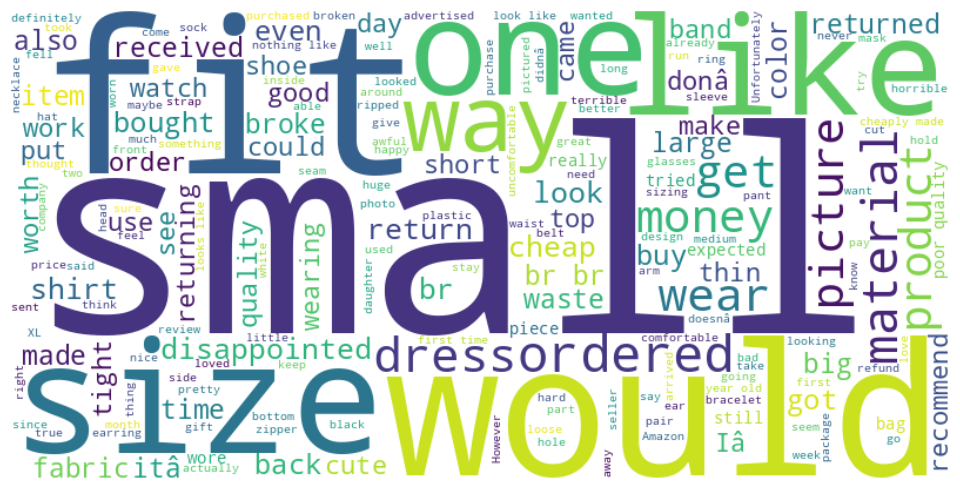

In [2]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Download stopwords (only once)
nltk.download('stopwords')

# Load your dataset
df = pd.read_csv("/content/amazon_fashion_reviews_cleaned.csv")  # Replace with your file path

# Combine all review text into one string
text = " ".join(str(review) for review in df["text"])

# Remove common stopwords
stop_words = set(stopwords.words('english'))

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stop_words,
    colormap='viridis'
).generate(text)

# Show the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()

# Save the image
plt.savefig("wordcloud.png", dpi=300)
